In [1]:
%matplotlib inline

import gym
import numpy as np
import matplotlib.pyplot as plt

from IPython import display

In [2]:
env = gym.make('CartPole-v0')
env.reset()

array([-0.02592848, -0.00251224,  0.04791774, -0.00451816])

In [3]:
#img = plt.imshow(env.render(mode='rgb_array')) # only call this once

In [4]:
N_ACTIONS = env.action_space.n
N_STATES  = env.observation_space.shape[0]

EPISODE_LENGTH = 250

In [5]:
def try_policy(policy, env):
    s0 = env.reset()
    img = plt.imshow(env.render(mode='rgb_array'))
    plt.show()
    state = s0
    reward = 0
    for step in range(EPISODE_LENGTH):
        img.set_data(env.render(mode='rgb_array'))
        plt.title("%s | Step: %d - reward %f" % (env.spec.id,step, reward))
        display.display(plt.gcf())
        display.clear_output(wait=True)
        action = policy(state)
        observation, reward, done, info = env.step(action)
        state = observation
        if done:
            print('Done in %d iterations'%step)
            break

# Exercise 1

## Going right policy

In [20]:
right_policy = lambda x : 1
try_policy(right_policy, env)

The environnment fires a stop when it reaches an unrecovarable state

## Going $sign(\theta)$ policy

In [58]:
sign_policy = lambda x : 1 if x[2] > 0 else 0
try_policy(sign_policy, env)

# Exercises 2 to 4

### Sigmoid policy - Gradient policy

In [6]:
class PolicyGradient:
    def __init__(self, env, episode_length=EPISODE_LENGTH, reg_l1 = 0):
        self.theta = np.random.random((N_STATES,)) - 0.5
        self.env = env
        self.episode_length = episode_length
        self.reg_l1 = reg_l1
        self.epoch = 0
        
    def policy_proba_right(self, state):
        return 1./(1+np.exp(-np.dot(self.theta, state)))
    
    def take_action(self, state):
        p = self.policy_proba_right(state)
        return np.random.binomial(1,p)
        #return int(np.round(p)+ 0.0001)
        
    def learning_rate(self):
        return 1/(10+self.epoch*0.1)

    def run_one_epoch(self):
        state = env.reset()
        episodes = []
        for i in range(self.episode_length):
            action = self.take_action(state)
            new_state, reward, done, info = env.step(action)
            reward -= abs(new_state[0])
            episodes.append([state, action, reward])
            state = new_state
            if done:
                break
        return episodes
    
    def estimate_baseline(self):
        baseline = np.zeros((self.episode_length))
        n = 10
        for i in range(n):
            episode = self.run_one_epoch()
            l = len(episode)
            cumulative = 0
            for i in range(l-1, -1, -1):
                cumulative += episode[i][2]
                baseline[i] += cumulative
        baseline /= n
        return baseline
                
    def train_one_epoch(self):
        baseline = self.estimate_baseline()
        episode = self.run_one_epoch()
        
        cumulative_reward = 0
        pg = np.zeros(N_STATES)
        
        for (state, action, reward), base in list(zip(episode, baseline))[::-1]:
            cumulative_reward += reward
            if action == 1:
                pg += (1-self.policy_proba_right(state))*state*(cumulative_reward-base) + self.reg_l1*np.sign(self.theta)
            else:
                pg += -self.policy_proba_right(state)*state*(cumulative_reward-base) - self.reg_l1*np.sign(self.theta)
        
        self.theta += self.learning_rate() * pg
        
        return cumulative_reward
        
    def train(self, n=100):
        rewards = []
        for i in range(n):
            rewards.append(self.train_one_epoch())
            print(np.mean(rewards[-10:]))
        

In [7]:
sigmoid_policy = PolicyGradient(env, reg_l1=0.01)

In [8]:
sigmoid_policy.train(200)

12.62803606140461
12.849066179220017
25.405678862037632
34.89639479989553
38.79709223979273
40.023306042363906
40.1022882806718
39.33102277086499
36.01179876036295
33.18390574761667
32.87049781232614
32.50591478851355
28.318629114886686
22.973121454916857
18.47998738950591
14.726067811704834
11.53372251229818
9.259867681408878
9.134393232547325
9.292885545729135
9.178048981958684
9.093997260095888
8.990946865752562
8.893649951496036
9.087306256633639
9.122886324741733
9.156267627345285
8.849862884555414
9.118359820924493
8.94535994516303
9.055997707013407
8.946336588874711
9.089244328510107
9.096680274362836
8.869349448319793
8.83230193336737
8.771281127808932
8.812996917372896
8.47068626237807
8.656289474279358
8.64181259264149
9.06490300691629
9.024606353818674
8.93875270488743
8.798813356858057
8.88940422043623
8.917050466024062
8.903615916596506
9.015579059455348
9.217538043555832
9.172476737620672
8.839494123876303
8.838056019803744
8.964375126571074
8.927375549958642
8.8404137347

In [9]:
sigmoid_policy.theta

array([ 0.32724725, 11.76391507,  3.2081918 ,  1.72244297])

Done in 199 iterations


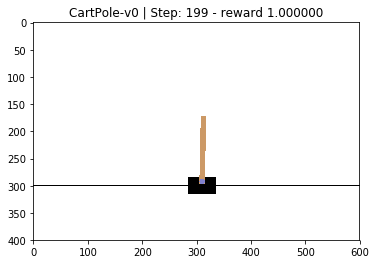

In [176]:
try_policy(sigmoid_policy.take_action, env)

In [119]:
sigmoid_policy.theta

array([ 3.92226949, 22.48545519, 30.49258139, 41.07389606])

In [88]:
sigmoid_policy.theta

array([-22.07766005,  68.62820363,  46.82557423,  24.51491989])

In [ ]:
#Todo: Define a Q-table to host the Q-function estimate
q_table = np.zeros(()
for i_episode in range(20):
    observation = env.reset()
    for t in range(100):
        env.render()
        print(observation)
        action = env.action_space.sample() # Returns a random action.
        # Todo: Replace the above function with one that selects an action based on your algorithm (i.e., SARSA with $\epsilon$-greedy exploration.
        
        observation, reward, done, info = env.step(action)
        # Todo: Update the tabular estimate of the Q-function using the update rule of the algorithm(SARSA or Q-learning)
        
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break